# Seaborn: Statistical Data Visualization

Source: 
    
    (https://seaborn.pydata.org/)

    https://seaborn.pydata.org/tutorial.html 


# Seaborn:

* a library for making attractive and informative statistical graphics in Python

* built on top of matplotlib and tightly integrated with the PyData stack, including 

    ** support for numpy and pandas data structures 
    
    ** statistical routines from scipy and statsmodels
    
    ** the plotting functions operate on dataframes and arrays containing a whole dataset 
    
    ** internally perform the necessary aggregation and statistical model-fitting to produce informative plots
    
    ** seaborn should be thought of as a complement to matplotlib, not a replacement for it

# Installing and getting started

# To install the latest release of seaborn, we can use pip, using conda, github:

# The commands are: 

pip install seaborn

conda install seaborn

pip to install the development version directly from github:

    pip install git+https://github.com/mwaskom/seaborn.git

    Another option would be to to clone the github repository install from your local copy:

    pip install .

# Dependencies
    Python 2.7 or 3.4+

# Mandatory dependencies
    numpy

    scipy

    matplotlib

    pandas

# Recommended dependencies
    statsmodels

# Controlling figure aesthetics

Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures

In [136]:
#%matplotlib inline

In [137]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

In [138]:
#Let’s define a simple function to generate evenly spaced points and to plot some sine waves
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        

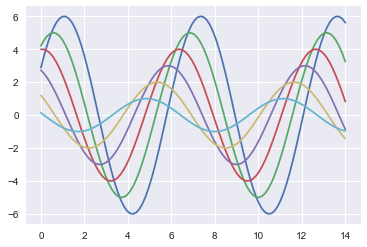

In [36]:
#This is what the plot looks like with matplotlib defaults:## checked with new notebook
sinplot()

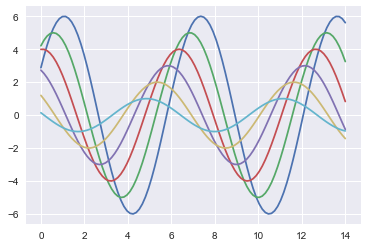

In [13]:
#To switch to seaborn defaults, simply call the set() function.
sns.set()
sinplot()

# Seaborn figure styles

In [ ]:
There are five preset seaborn themes: 
    
    darkgrid, 
    
    whitegrid, 
    
    dark, 
    
    white, and 
    
    ticks. 
They are each suited to different applications and personal preferences. 

The default theme is darkgrid. 

# whitegrid
It suited to plots with heavy data elements

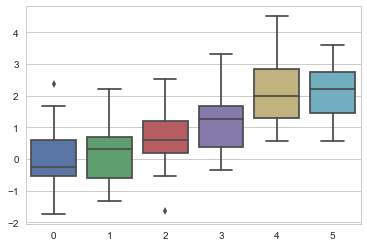

In [37]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

# dark and white
Used when the grid is less necessary.

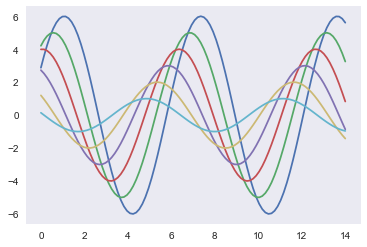

In [38]:
sns.set_style("dark")
sinplot()

In [48]:
# QUESTION: How can we plot the graph with a white theme???

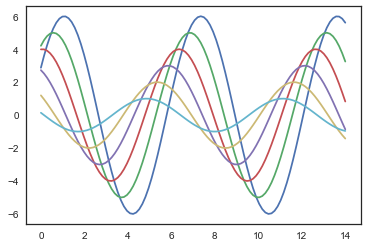

In [49]:
sns.set_style("white")
sinplot()

# ticks

When we want to give a little extra structure to the plots, we can use the ticks theme

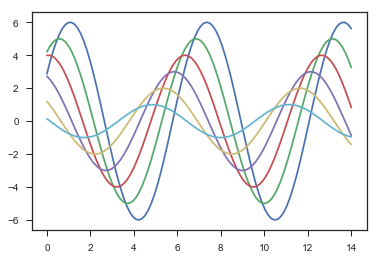

In [43]:
sns.set_style("ticks")
sinplot()

# Removing axes spines

Both the white and ticks styles can benefit from removing the top and right axes spines, which are not needed. It’s impossible to do this through the matplotlib parameters, but you can call the seaborn function despine() to remove them:

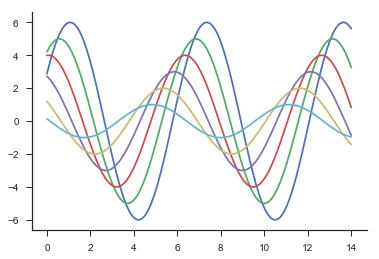

In [44]:
sinplot()
sns.despine()

Some plots benefit from offsetting the spines away from the data, which can also be done when calling despine(). 
When the ticks don’t cover the whole range of the axis, the trim parameter will limit the range of the surviving spines.

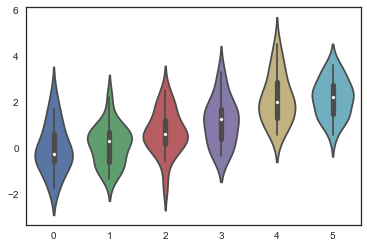

In [50]:
f, ax = plt.subplots()
sns.violinplot(data=data)
#sns.despine(offset=10, trim=True);

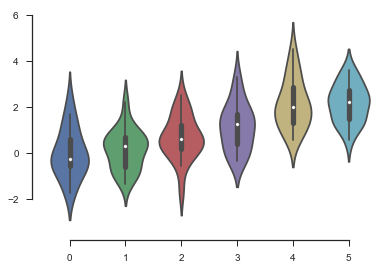

In [47]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

In [ ]:
We can also control which spines are removed with additional arguments to despine():

In [ ]:
# QUESTION: Can you try how we could do that??? Try to use the bar plots

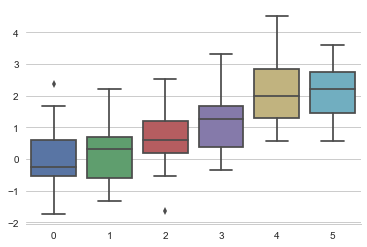

In [56]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

# Temporarily setting figure style

Although it’s easy to switch back and forth, you can also use the axes_style() function in a with statement to temporarily set plot parameters.

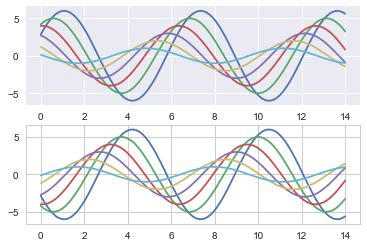

In [60]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

# Overriding elements of the seaborn styles

We can customize the seaborn styles by passing a dictionary of parameters to the rc argument of axes_style() and set_style()

Before making any changes, if we want to see what parameters are included, we can just call the function with no arguments, which will return the current settings

In [ ]:
# QUESTION: Can you try how we could do that???

In [62]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

We can then set different versions of these parameters:

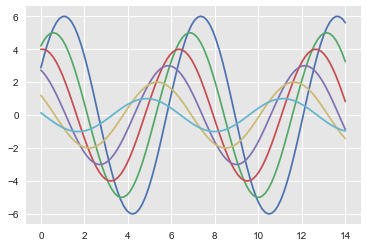

In [65]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

# Scaling plot elements¶

A separate set of parameters control the scale of plot elements, which should let us use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

First let’s reset the default parameters by calling set():

In [78]:
sns.set_context()

The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. The notebook style is the default, and was used in the plots above.

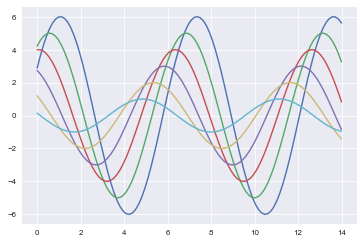

In [73]:
sns.set_context("paper")
sinplot()

In [ ]:
# QUESTION: Can change to the other contexts??? What changes did you observe???

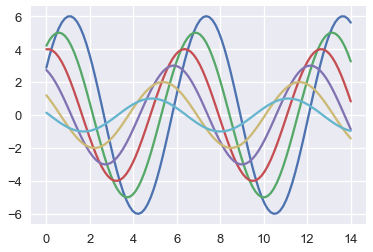

In [74]:
sns.set_context("talk")
sinplot()

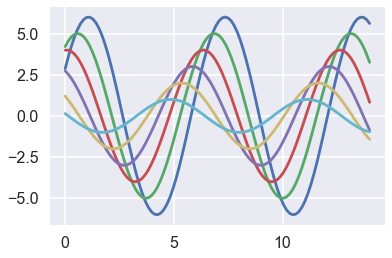

In [75]:
sns.set_context("poster")
sinplot()

We can also independently scale the size of the font elements when changing the context. (This option is also available through the top-level set() function).

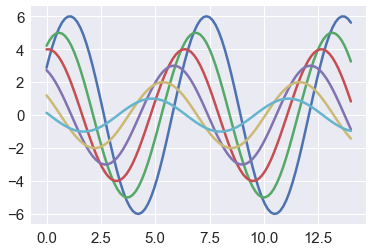

In [79]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

# Choosing color palettes

Colors can reveal patterns in the data if used effectively

In [80]:
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

# Qualitative color palettes

These techniques can be used when you want to distinguish discrete chunks of data that do not have an inherent ordering

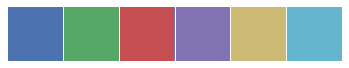

In [81]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

# Using circular color systems

It is used when we want more than 6 colors
The most common way to do this uses the hls color space, which is a simple transformation of RGB values.

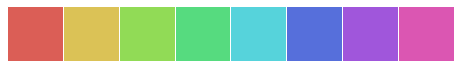

In [85]:
sns.palplot(sns.color_palette("hls", 8))

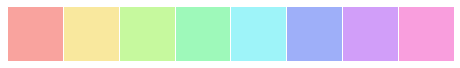

In [90]:
sns.palplot(sns.hls_palette(8, l=.8, s=.9))

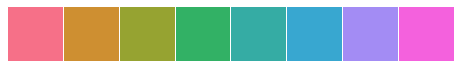

In [94]:
sns.palplot(sns.color_palette("husl", 8))

# Using categorical Color Brewer palettes

It is applied when we want to use equential and diverging palettes. They will start to cycle at some point

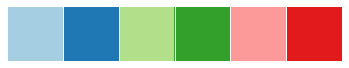

In [112]:
sns.palplot(sns.color_palette("Paired"))

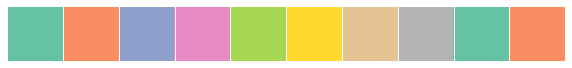

In [113]:
sns.palplot(sns.color_palette("Set2", 10))

In order to assign the combination of the colors we want, we use the following 

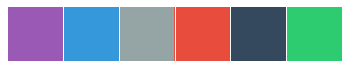

In [105]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

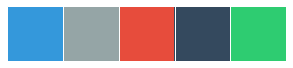

In [107]:
flatui = ["#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

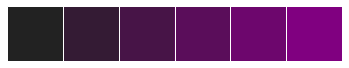

In [114]:
import seaborn as sns; 
sns.set()
sns.palplot(sns.dark_palette("purple"))

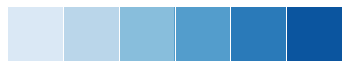

In [115]:
sns.palplot(sns.color_palette("Blues"))

In [110]:
# QUESTION: What do we do if we need to see the sequence of green colors???

# NOTE: We should bear in mind the issue of color blindness when we try to use different colors. Avoid red and green for plot elements

Let us try to apply the color choices in the plots to temporarily change the color combinations

With the default color pallets

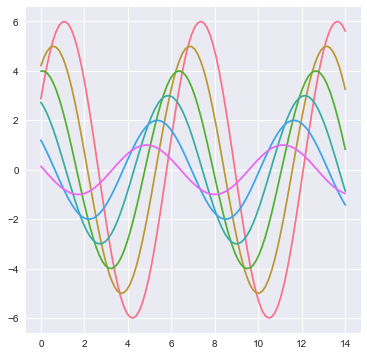

In [123]:
sns.set_palette("husl")
sinplot()

The color_palette() function can also be used in a with statement to temporarily change the color palette.

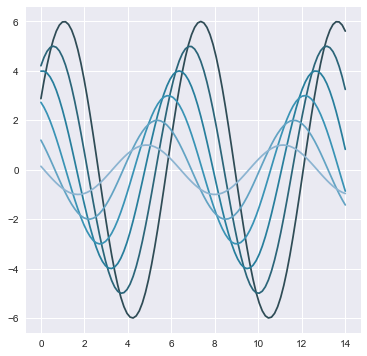

In [124]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

# Plotting functions

# Visualizing the distribution of a dataset

# Plotting univariate distributions¶

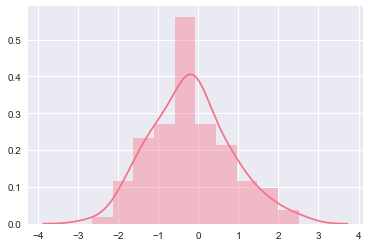

In [140]:
# By default, this will draw a histogram (Histograms with KDEs)
x = np.random.normal(size=100)
sns.distplot(x);

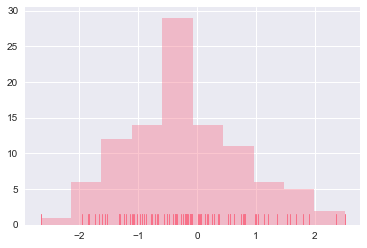

In [142]:
# It is to remove the density curve and add a rug plot, which draws a small vertical tick at each observation (Histog)
sns.distplot(x, kde=False, rug=True);


When trying more or fewer bins might reveal other features in the data:

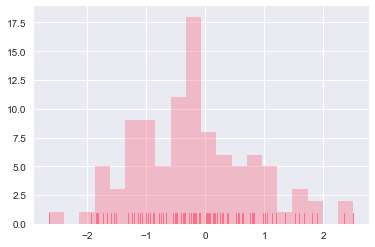

In [143]:
#Histogram with more number of bins
sns.distplot(x, bins=20, kde=False, rug=True);

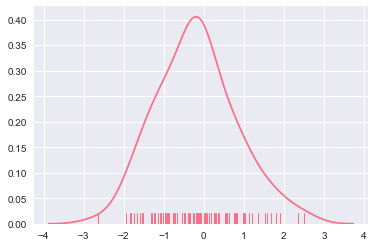

In [144]:
# Kernel density estimaton (plot that can be a useful tool for plotting the shape of a distribution)
sns.distplot(x, hist=False, rug=True);

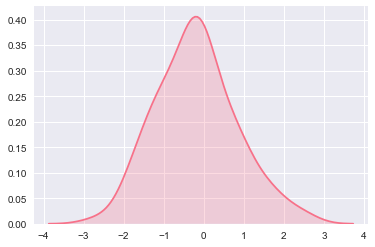

In [145]:
sns.kdeplot(x, shade=True);

The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram

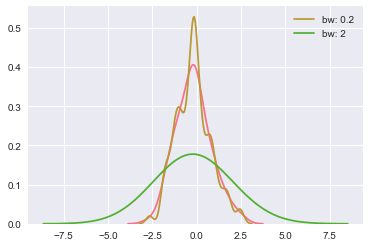

In [149]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

# Plotting bivariate distributions¶

It can also be useful to visualize a bivariate distribution of two variables (jointplot() function)

In [156]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

# Scatterplots

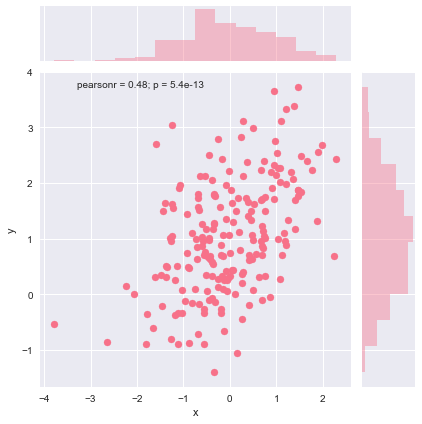

In [157]:
sns.jointplot(x="x", y="y", data=df);

# Hexbin plots

The bivariate analogue of a histogram, shows the counts of observations that fall within hexagonal bins, best with relatively large datasets, available through the matplotlib plt.hexbin function and as a style in jointplot(), looks best with a white background:

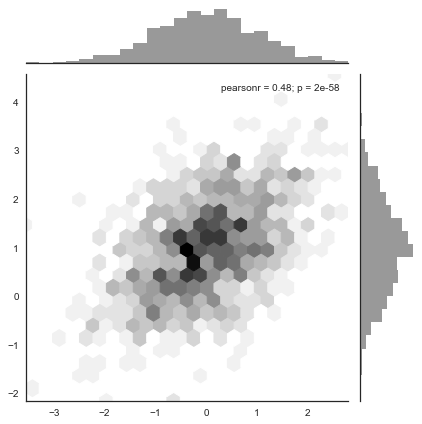

In [162]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

# Kernel density estimation

It is used to visualize a bivariate distribution, it is shown with a contour plot and is available as a style in jointplot():

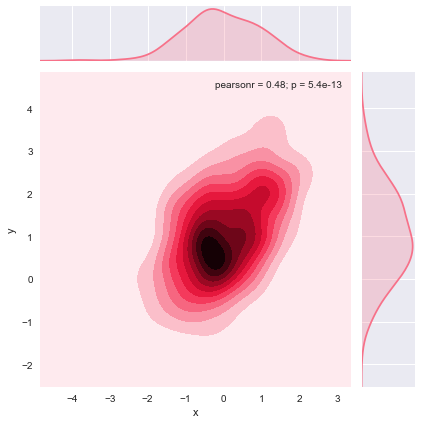

In [163]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

To show the bivariate density more continuously, you can simply increase the number of contour levels:

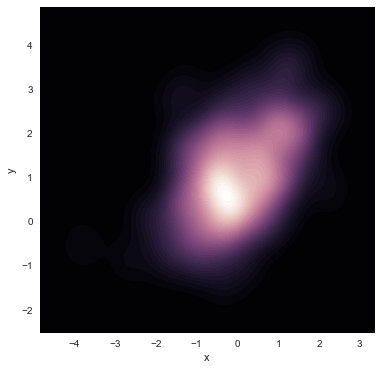

In [168]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

# Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset (individual (diagonal) and pair wise)

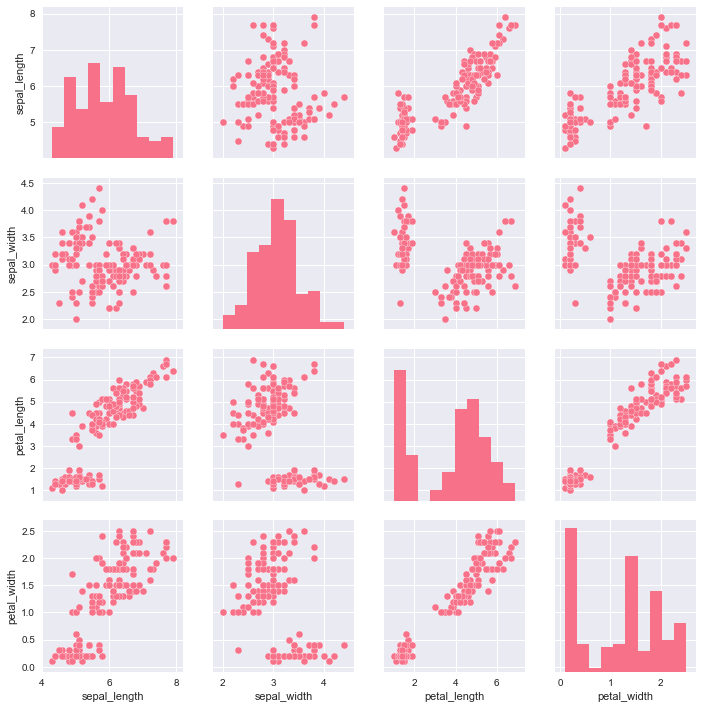

In [173]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Much like the relationship between jointplot() and JointGrid, the pairplot() function is built on top of a PairGrid object, which can be used directly for more flexibility:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/eyerusalemfithawok/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


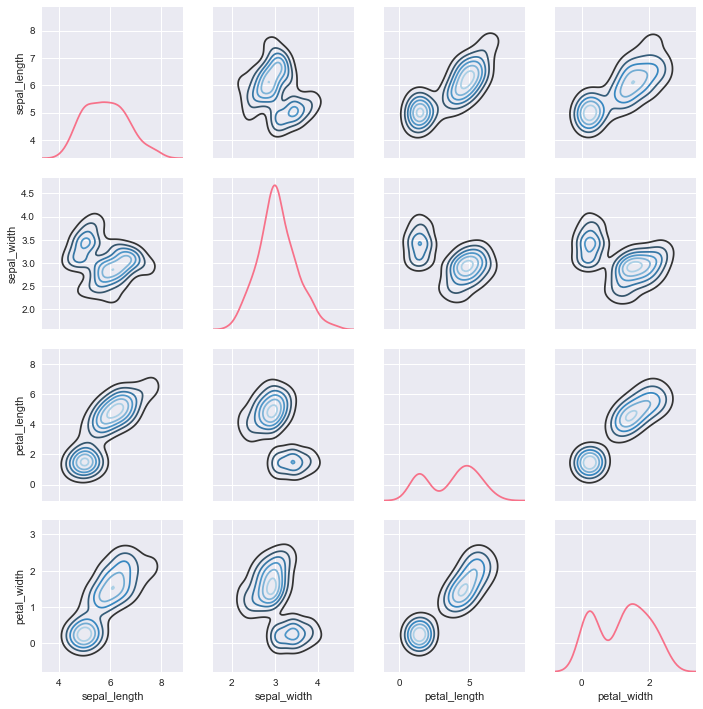

In [175]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

# Plotting with categorical data¶

In [180]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

# Categorical scatterplots¶

To show the the values of some quantitative variable across the levels of a categorical variable uses stripplot()

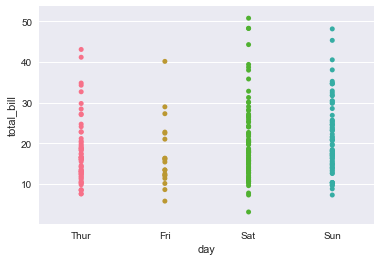

In [184]:
# uses stripplot()
sns.stripplot(x="day", y="total_bill", data=tips);

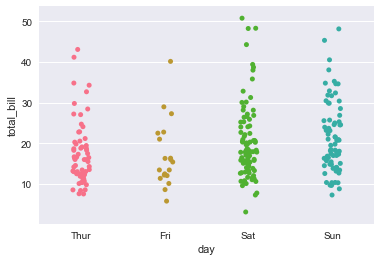

In [185]:
# Using some random “jitter”:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

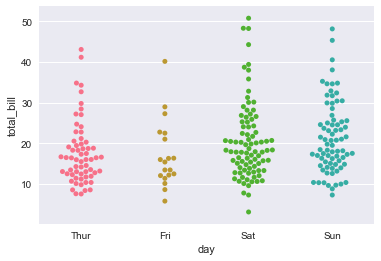

In [186]:
# Using the function swarmplot()
sns.swarmplot(x="day", y="total_bill", data=tips);

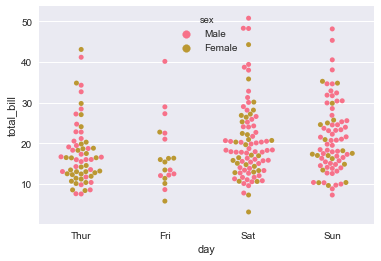

In [187]:
# Add a nested categorical variable with the hue parameter
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

We can show categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories)

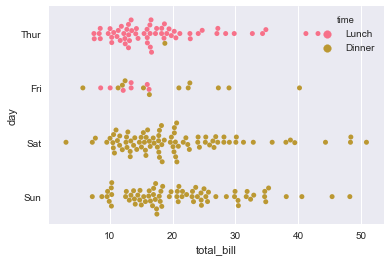

In [190]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

# Distributions of observations within categories¶

# Boxplots

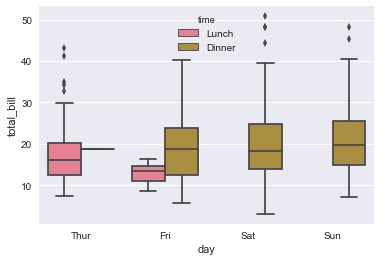

In [191]:
# It shows the three quartile values of the distribution along with extreme values
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

# Violinplots

It combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

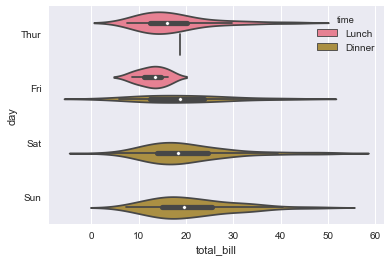

In [192]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

In [ ]:
# “split” the violins when the hue parameter has only two levels,

Statistical estimation within categories


Often, rather than showing the distribution within each category, you might want to show the central tendency of the values. Seaborn has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.

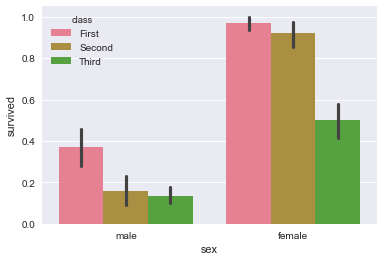

In [202]:
# Bar plots
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

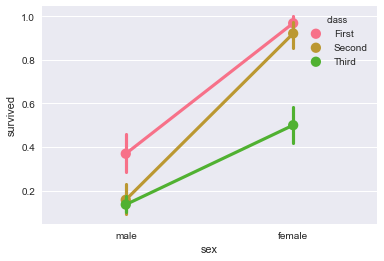

In [201]:
# Point plots¶
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

# Visualizing linear relationships¶

Functions to draw linear regression models¶(These functions, regplot() and lmplot() )

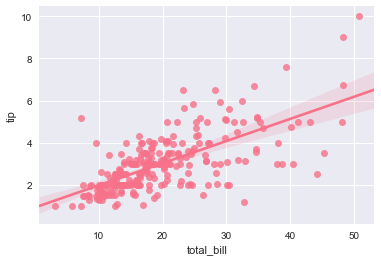

In [197]:
sns.regplot(x="total_bill", y="tip", data=tips);

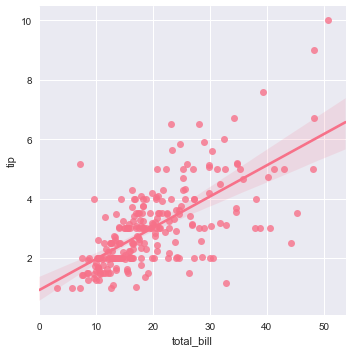

In [199]:
sns.lmplot(x="total_bill", y="tip", data=tips);

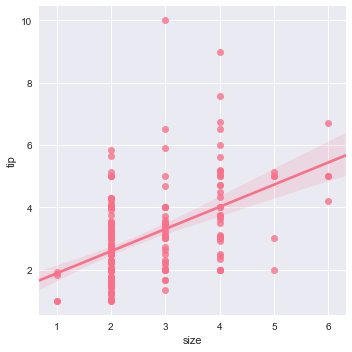

In [200]:
sns.lmplot(x="size", y="tip", data=tips);

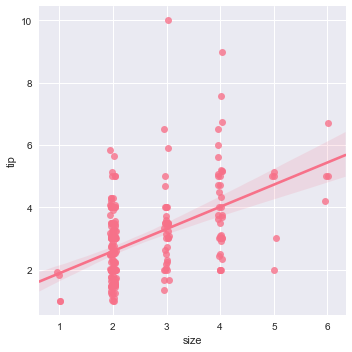

In [203]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

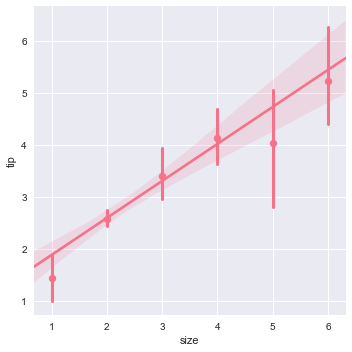

In [204]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);


# Fitting different kinds of models

In [206]:
anscombe = sns.load_dataset("anscombe")

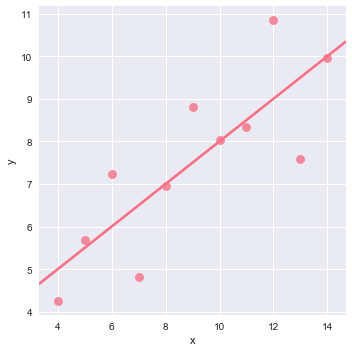

In [207]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});


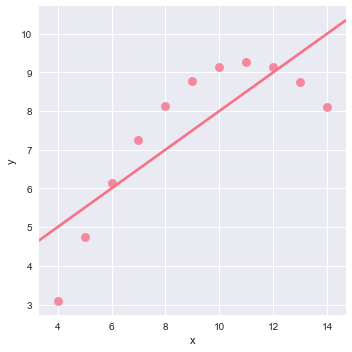

In [208]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80}); 

In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

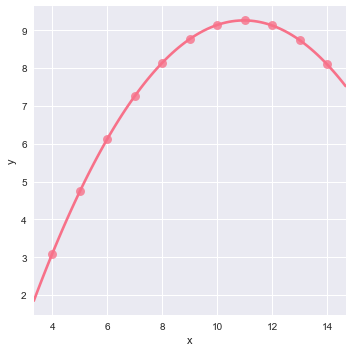

In [209]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

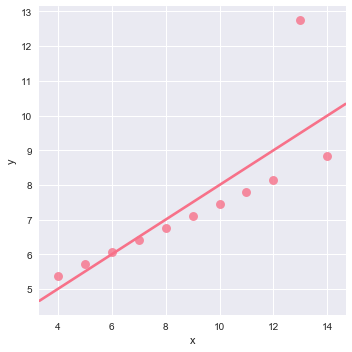

In [210]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

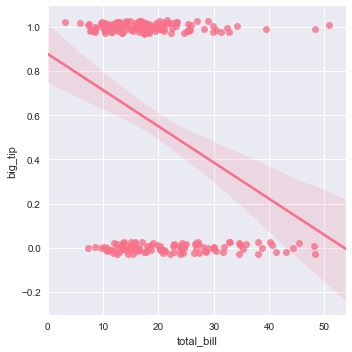

In [211]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

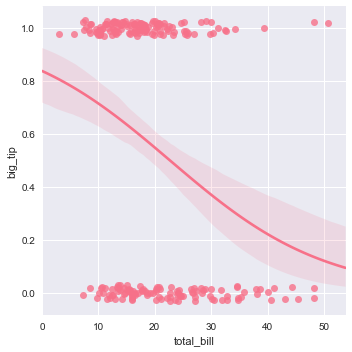

In [212]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

# Plotting on data-aware grids¶

Pairwise relationships in different forms

It’s possible to plot a different function on the diagonal to show the univariate distribution of the variable in each column. Note that the axis ticks won’t correspond to the count or density axis of this plot, though.

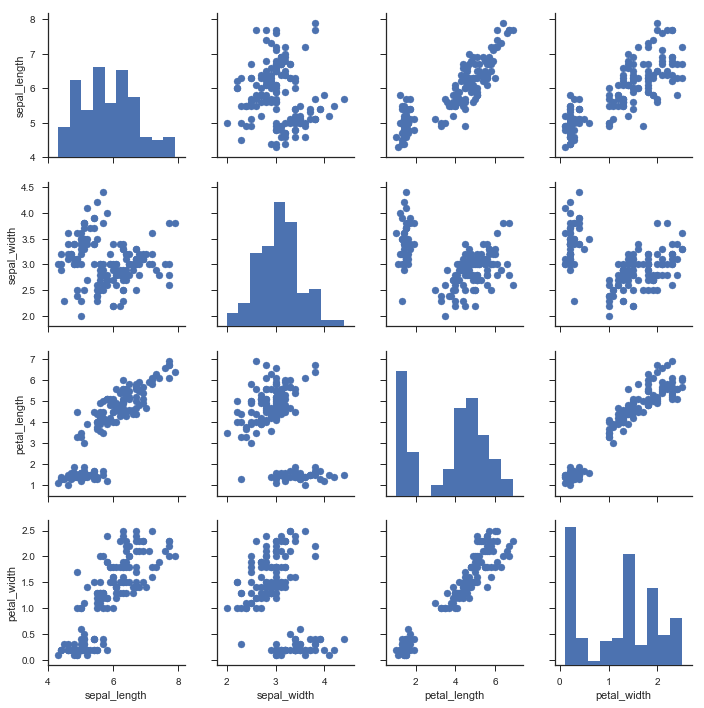

In [221]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

A very common way to use this plot colors the observations by a separate categorical variable. For example, the iris dataset has four measurements for each of three different species of iris flowers so you can see how they differ.

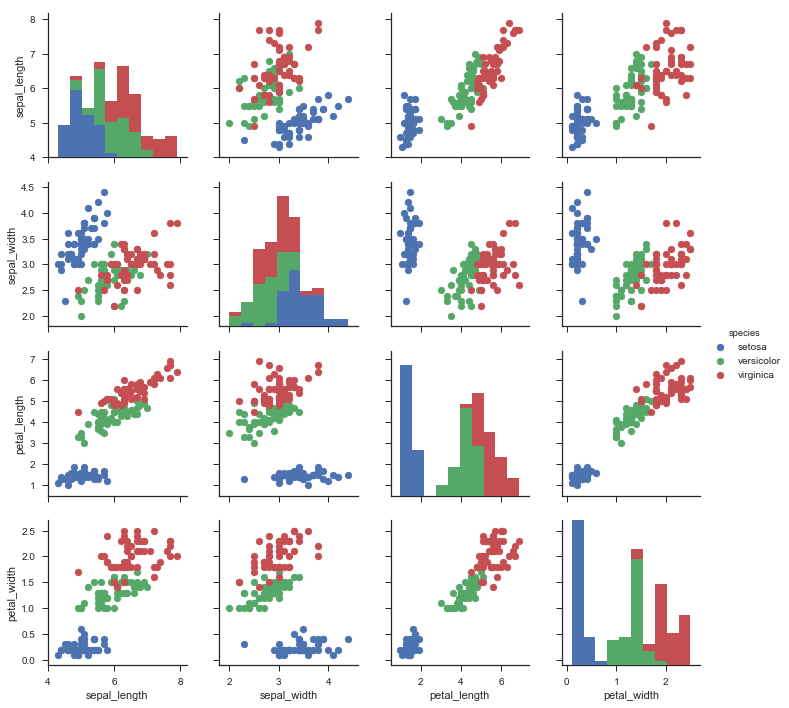

In [222]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

By default every numeric column in the dataset is used, but you can focus on particular relationships if you want.

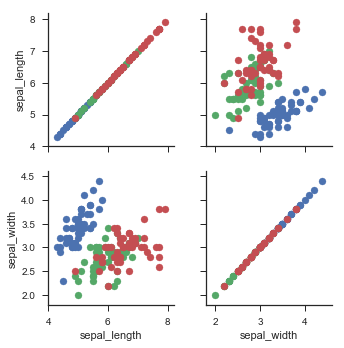

In [223]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

It’s also possible to use a different function in the upper and lower triangles to emphasize different aspects of the relationship.

/Users/eyerusalemfithawok/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


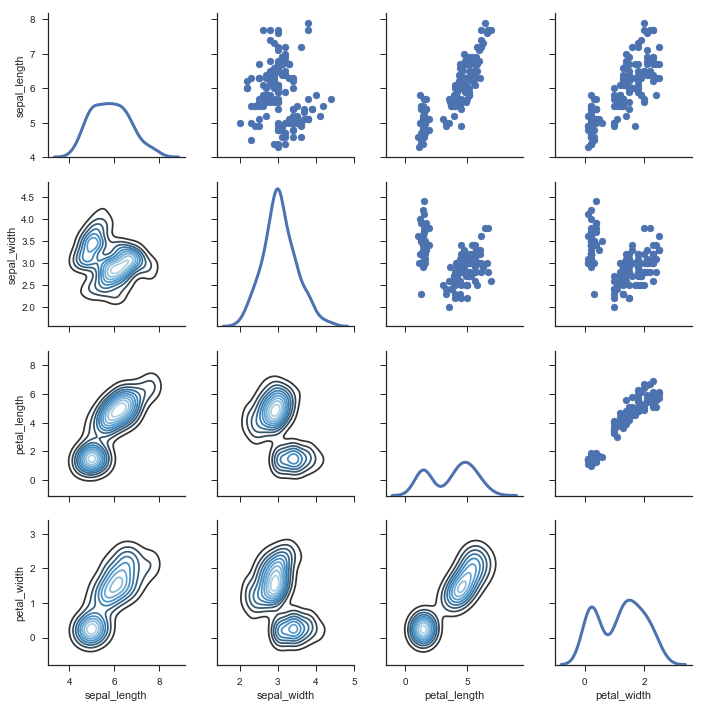

In [224]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);

You can also control the aesthetics of the plot with keyword arguments, and it returns the PairGrid instance for further tweaking.

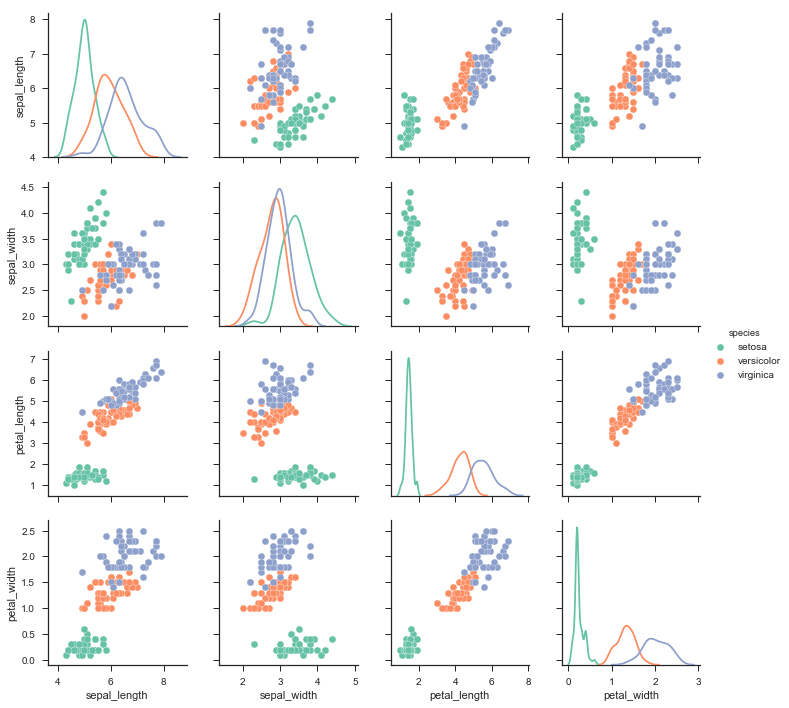

In [225]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)